# Take home Exam 2

## Subject : Teleportation protocol

### 1. Quantum entanglement

Before seeing the quantum teleportation protocol, it is very important to understand the notion of entanglement.
<br>Quantum entanglement is a state, a relationship between two or more particles.
<br>To understand the nature of this relationship, we will look together at four examples of behavior following the same protocol.
<br>Charlie prepares a pair of boxes. He sends a box to Alice and a box to Bob. Each box has two switches that make the contents of the box visible: either a plus or a minus,potentially depending on the switch used, all this being programmed by Charlie.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/situation initial.png'  width="800px" />    
    </tr>
</table>
<br>Alice will always open the box first by convention. In each of the four cases, the experiment will be repeated a large number of times to get satisfactory results.<br><br>
First case:
<br><br>Alice and Bob realize that no matter how they open the boxes, from their respective points of view, there is 50% more and 50% less.
<br>They also notice that if they make global statistics, they obtain 25% for each of the four possible cases (+,-),(+,+),(-,+) and (--).
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/resultatcase1.png'  width="800px" />    
    </tr>
</table>
<br>This case is therefore the case where there is no correlation between the contents of the boxes of the same pair, nor any relation between their contents and the switches.<br><br>
Second case:
<br><br>Alice and Bob always note independently that there seems to be 50% + and 50% -.
<br>However, when they do the global statistics, they realize that there are 50% pairs (+,+) and 50% pairs (-,-) and that this does not depend on the switches used to open the boxes.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/resultatcase2.png'  width="800px" />    
    </tr>
</table>
<br>This time there is clearly a correlation between the contents of the boxes. We can imagine Charlie's protocol very well: He draws, at random, a plus or a minus and fills the two boxes identically.<br><br>
Third case:
<br><br>As always Alice and Bob find that their respective content seems independent of their choice of switch and they again notice independently that there seems to be 50% + and 50% -.
<br>Nevertheless, on a global level, something strange is happening. Bob always seems to get + when Alice decides to open her box with the red switch and - when she opens her box with the green switch.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/resultatcase3.png'  width="800px" />    
    </tr>
</table>
<br>There is clearly a hidden device here to transfer information like a relay antenna from the contents of alice's box to bob's box. It is therefore a case of correlation but with information transfer. Indeed, Alice could use the statistical behavior of this third series to communicate a message to bob simply by pressing the button according to an agreed code (green = 1, blue =0) for example.
<br>It is this transfer of information that cannot take place faster than light according to special relativity.<br><br>
Fourth case:
<br><br>As usual Alice and Bob find that their respective content seems independent of their choice of switch and they again notice independently that there seems to be 50% + and 50% -.
<br>Nevertheless we will realize an even stranger behavior when we make the statistics by pair of boxes.
<br>When alice and bob both press the red button, they always get the opposite result, (+,-) with a 50% probability and (+,-) with a 50% probability.
<br>In all other cases, they find the same result with an equivalent probability, (+,+) with a 50% probability and (+,+) with a 50% probability.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/resultatcase4.png'  width="800px" />    
    </tr>
</table>
<br> There is a new kind of correlation here. In this case, what Alice does does not influence what Bob sees, who will always see 50% more and 50% less. It is therefore impossible here to use this correlation to send any information to Bob.
<br>We can easily convince ourself that charlie has no way to program the pairs of boxes at their creation to allow such a statistic.
<br>To sum up, we can distinguish 4 types of relations: total independence, correlation decided at creation, causal correlation which allows to transfer information (speed limited by relativity) and finally strange correlation in which the choices of Alice and Bob act on a statistic which concerns the whole system but not on a local statistic. So there is neither remote causality nor correlation programmed at the creation of the boxes.
<br>It is this fourth case that is called quantum entanglement. We can form systems of several particles, where an action on a particle will INSTANTLY influence a global statistic but without this allowing to transfer any information.
<br>Quantum entanglement, seen above, is at the heart of quantum teleportation.

### 2. The quantum teleportation protocol

#### 2.1 the circuit

Now we will set up the circuit for quantum teleportation. We have to keep in mind that we teleport the state of a qubit to another qubit, it is not a teleportation of a physical object. 

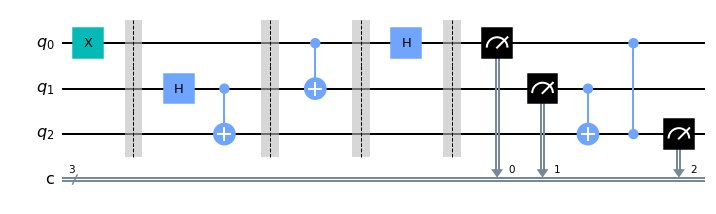

In [4]:
%matplotlib inline
from qiskit import *
from qiskit.tools.visualization import plot_histogram

circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure(2,2)
circuit.draw(output='mpl')

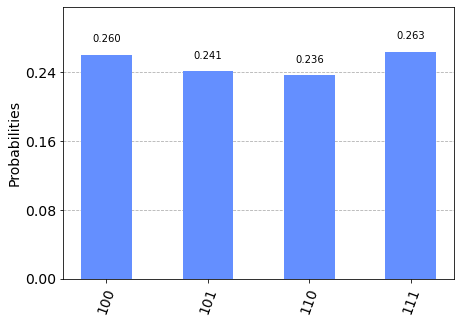

In [5]:
#We make experience by using qiskit

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shot = 2048).result()
counts = result.get_counts()
plot_histogram(counts)


In [17]:
#Or by using a real quantum computer with IBM Quantum Experience

from qiskit.tools.monitor import job_monitor

IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibmq_santiago')
job=execute(circuit,backend=qcomputer)
job_monitor(job)
result=job.result()
plot_histogram(result.get_counts(circuit))

ibmqfactory.load_account:WARNING:2021-06-19 01:01:33,981: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (19)    

IBMQJobApiError: '"HTTPSConnectionPool(host=\'api.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/Network/ibm-q/Groups/open/Projects/main/Jobs/60cd25d268d495e4db92938a/status/v/1 (Caused by NewConnectionError(\'<urllib3.connection.HTTPSConnection object at 0x0000020FDA7C5640>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed\'))"'

#### 2.2 demonstration

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
We can notice that the last qubit (q2) which is the measure of the last bit is always equal to one. This corresponds to the state of q0 after the first gate (X). The protocol seems to work well. Now we will demonstrate this rigorously.
<br><br> Alice has qubits q0 and q1 while Bob has the qubit q2.
<br>Let's call $\ket{\varphi} = \alpha\ket{0} + \beta\ket{1}$ the state of q0 at the first barrier, q1 and q2 are in the state $\ket{0}$. Therefore at the first barrier, the state of the whole system is $\ket{\Psi_0} = \ket{\varphi00}$. Let's compute the state for each barrier.
<br><br> $\ket{\Psi_1} = \ket{\varphi}\otimes({CNOT}\otimes({H}\otimes{I}\ket{00}))=\ket{\varphi}\otimes{\ket{EPR}} = \frac{1}{\sqrt{2}}(\alpha\ket{000}+\alpha\ket{011}+\beta\ket{100}+\beta\ket{111})$
<br><br>$\ket{\Psi_2} = CNOT\otimes{I}\ket{\Psi_1} = \frac{1}{\sqrt{2}}(\alpha\ket{000}+\alpha\ket{011}+\beta\ket{110}+\beta\ket{101})$
<br><br>$\ket{\Psi_3} = H\otimes{I}\otimes{I}{\ket{\Psi_2}} = \frac{1}{\sqrt{2}}(\alpha(\frac{1}{\sqrt{2}}(\ket{000}+\ket{100}))+\alpha(\frac{1}{\sqrt{2}}(\ket{011}+\ket{111}))+\beta(\frac{1}{\sqrt{2}}(\ket{110}-\ket{010}))+\beta(\frac{1}{\sqrt{2}}(\ket{011}-\ket{111}))) =\frac{1}{2}(\alpha((\ket{000}+\ket{100}+\ket{011}+\ket{111})+\beta(\ket{010}-\ket{110}+\ket{001}-\ket{101})) = \frac{1}{2}(\ket{00}\otimes({\alpha\ket{0} + \beta\ket{1}}) + \ket{01}\otimes({\alpha\ket{1} + \beta\ket{0}}) + \ket{10}\otimes({\alpha\ket{0} - \beta\ket{1}}) + \ket{11}\otimes({\alpha\ket{1} - \beta\ket{0}})$
<br><br>Here we can clearly see the 4 cases of measurements of qubits q0 and q1.
<br><br>First case : Alice measures $\ket{00}$
<br>Here bob applies no more gates and q3 is in the initial state of q1 $\ket{\varphi}$ .
<br><br>Second case : Alice measures $\ket{01}$
<br>Here Bob applies X on his qubits $X(\alpha\ket{1} + \beta\ket{0}) = \alpha\ket{0} + \beta\ket{1} = \ket{\varphi}$
<br><br>Third case : Alice measures $\ket{10}$
<br>Here Bob applies Z on his qubits $Z(\alpha\ket{0} - \beta\ket{1}) = \alpha\ket{0} - (-\beta\ket{1}) = \alpha\ket{0} + \beta\ket{1} = \ket{\varphi}$
<br><br>Fourth and last case : Alice measures $\ket{11}$
<br>Here Bob applies X and Z on his qubits $Z(X(\alpha\ket{1} - \beta\ket{0})) = Z(\alpha\ket{0} - \beta\ket{1}) =\alpha\ket{0} - (-\beta\ket{1}) = \alpha\ket{0} + \beta\ket{1} = \ket{\varphi}$

<br><br>So for all the possible cases of measurement of the first two qubits by Alice. Bob will find the initial state of q0 by applying cz and cx.
<br>QED

#### 2.3 Intuitive explanation

First, we create a quantum entanglement between Alice's second qubit and Bob's qubit thanks to the combination of a Hadamard gate and a CNOT gate.
<br>This pair of intricate qubit is in the strongest intricate state. As much chance to measure 0 or 1 on one qubit and automatically results in the same value on the other qubit.
<br>Alice then applies the CNOT gate between the qubit she wants to teleport and the intricate qubit pair she shares with Bob. We then obtain a triplet of qubit entangled together. Alice will then apply the Hadamard gate on the qubit to send and measure its two qubits which will break the entanglement and "constrain" the state of the bob qubit.
<br>By applying the right gates according to the measure of the two qubits of Alice (possible with the gates control-not and control-z), the qubit of bob is found, in any case, in the initial state of the qubit that Alice wished to send.